In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

ANALISIS DATASET DAN PREDIKSI DENGAN MACHINE LEARNING

Penulis: Helmi Azkia - A11.2022.14733

RINGKASAN
Proyek ini bertujuan untuk menganalisis dataset yang diunggah oleh pengguna, melakukan eksplorasi data, dan membuat prediksi menggunakan model pembelajaran mesin. Aplikasi berbasis web dibuat menggunakan Streamlit, dan algoritma pembelajaran mesin yang digunakan adalah Random Forest Classifier.

PERMASALAHAN
1. Bagaimana cara menganalisis dataset dengan cepat dan efisien?  
2. Bagaimana membangun model Machine Learning yang mampu memprediksi data baru dengan akurasi tinggi?  
3. Bagaimana menyajikan hasil analisis dan prediksi dalam antarmuka yang mudah digunakan?

TUJUAN PROYEK
- Membangun aplikasi yang dapat memproses dan menganalisis dataset.
- Melatih model Machine Learning untuk prediksi.
- Memberikan wawasan melalui visualisasi data dan metrik evaluasi.

TUJUAN YANG AKAN DICAPAI

1. Melakukan Analisis Data Awal (EDA)
Memahami karakteristik dataset melalui eksplorasi statistik deskriptif, visualisasi data, dan pemeriksaan pola-pola penting. EDA bertujuan untuk mendapatkan wawasan yang lebih dalam tentang struktur data, distribusi fitur, serta hubungan antar variabel.

2. Mengidentifikasi Masalah dalam Dataset
Mengatasi potensi permasalahan pada dataset seperti nilai kosong, data tidak seimbang, atau outlier yang dapat memengaruhi performa model.

3. Melakukan Pemrosesan Data dan Pemilihan Fitur
Menyiapkan dataset yang bersih dan relevan dengan memilih fitur penting, melakukan encoding terhadap data kategorikal, serta menormalkan data jika diperlukan.

4. Melatih Model Machine Learning
Menggunakan model pembelajaran mesin untuk memprediksi atau mengklasifikasikan data berdasarkan tujuan proyek. Pada proyek ini, digunakan model Random Forest Classifier sebagai metode utama.

5. Evaluasi Kinerja Model
Mengukur performa model menggunakan metrik evaluasi seperti akurasi, precision, recall, F1-score, dan melihat tingkat pentingnya fitur.

6. Prediksi Data Baru
Membuat antarmuka yang interaktif (melalui Streamlit) untuk memprediksi data baru berdasarkan model yang sudah dilatih, sehingga pengguna dapat menggunakannya secara langsung.

7. Menyusun Kesimpulan dan Rekomendasi
Berdasarkan analisis dan hasil model, menarik kesimpulan dan memberikan rekomendasi yang dapat diterapkan di dunia nyata sesuai dengan konteks permasalahan.

8. Menyediakan Aplikasi yang Dapat Diakses
Menyediakan solusi yang dapat digunakan melalui aplikasi berbasis web (misalnya Streamlit) agar hasil analisis dan model prediktif dapat dimanfaatkan secara praktis oleh pengguna non-teknis.


MODE/ALUR PENYELESAIAN

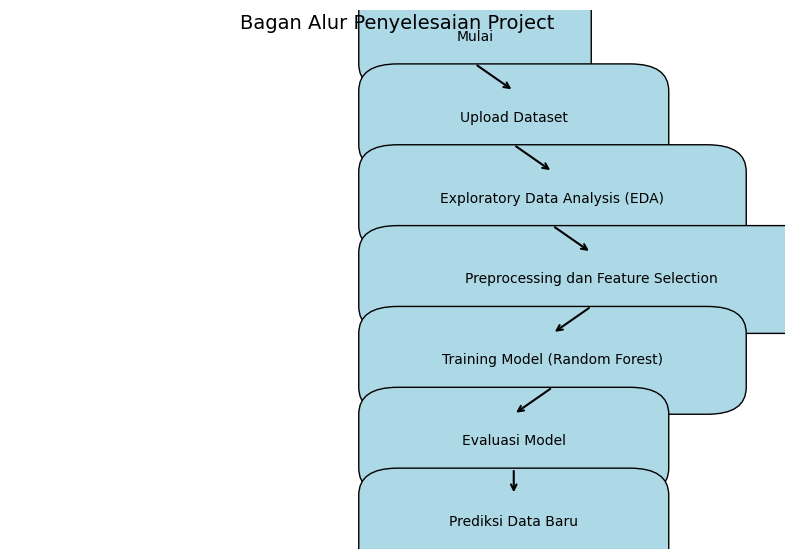

In [1]:
#MODE / ALUR PENYELESAIAN

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Remove axes
ax.axis("off")

# Define boxes and connections
boxes = [
    {"text": "Mulai", "xy": (0.5, 0.9), "width": 0.2, "height": 0.1},
    {"text": "Upload Dataset", "xy": (0.5, 0.75), "width": 0.3, "height": 0.1},
    {"text": "Exploratory Data Analysis (EDA)", "xy": (0.5, 0.6), "width": 0.4, "height": 0.1},
    {"text": "Preprocessing dan Feature Selection", "xy": (0.5, 0.45), "width": 0.5, "height": 0.1},
    {"text": "Training Model (Random Forest)", "xy": (0.5, 0.3), "width": 0.4, "height": 0.1},
    {"text": "Evaluasi Model", "xy": (0.5, 0.15), "width": 0.3, "height": 0.1},
    {"text": "Prediksi Data Baru", "xy": (0.5, 0.0), "width": 0.3, "height": 0.1}
]

# Plot boxes
for box in boxes:
    rect = mpatches.FancyBboxPatch(box["xy"], box["width"], box["height"],
                                   boxstyle="round,pad=0.05", edgecolor="black", facecolor="#ADD8E6")
    ax.add_patch(rect)
    ax.text(box["xy"][0] + box["width"] / 2, box["xy"][1] + box["height"] / 2, box["text"],
            ha="center", va="center", fontsize=10)

# Plot arrows
for i in range(len(boxes) - 1):
    start = (boxes[i]["xy"][0] + boxes[i]["width"] / 2, boxes[i]["xy"][1])
    end = (boxes[i + 1]["xy"][0] + boxes[i + 1]["width"] / 2, boxes[i + 1]["xy"][1] + boxes[i + 1]["height"])
    ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", color="black", lw=1.5))

# Display the diagram
plt.title("Bagan Alur Penyelesaian Project", fontsize=14, y=0.95)
plt.show()


PENJELASAN DATASET
Dataset ini memiliki 1.319 entri dan 9 kolom. Berikut adalah ringkasan informasi dataset:

Struktur Kolom Dataset
1. age (int64): Usia pasien.
2. gender (int64): Jenis kelamin pasien (0 untuk perempuan, 1 untuk laki-laki).
3. impluse (int64): Denyut nadi pasien.
4. pressurehight (int64): Tekanan darah sistolik.
5. pressurelow (int64): Tekanan darah diastolik.
6. glucose (float64): Kadar glukosa darah.
7. kcm (float64): Indikator tertentu (kemungkinan terkait metabolisme).
8. troponin (float64): Kadar troponin (penanda serangan jantung).
9. class (object): Kategori hasil diagnosis (positive/negative).
Statistik Deskriptif
- Rata-rata usia: 56.2 tahun.
- Gender: Sekitar 66% laki-laki (mean = 0.66).
- Denyut nadi rata-rata: 78 bpm.
- Tekanan darah sistolik: 127 mmHg.
- Tekanan darah diastolik: 72 mmHg.
- Glukosa darah rata-rata: 146 mg/dL.
- Kadar troponin memiliki nilai yang mencolok pada kasus tertentu (maksimum mencapai 10.3, menunjukkan potensi serangan jantung parah).
Perhatikan
- Kolom target adalah class: positif atau negatif.
- Ada variabel yang mungkin perlu transformasi atau normalisasi, terutama untuk nilai seperti kcm dan troponin karena ada outlier yang tinggi.

EXPLORATIONN DATA ANALYSIS (EDA)
Exploratory Data Analysis (EDA)

Dari kode yang Anda berikan, Exploratory Data Analysis (EDA) dan Proses Feature Engineering dapat diidentifikasi pada beberapa bagian utama. Berikut adalah penjelasannya:

1. Exploratory Data Analysis (EDA)
EDA adalah proses untuk memahami dataset sebelum melanjutkan ke pemodelan. Dari kode Anda, bagian yang berkaitan dengan EDA adalah:
a. Informasi Awal Datase

In [5]:
data = pd.read_csv('Dataset/heart_attack.csv')
data.sample(10)
data.info()
print("Total Baris: ", data.shape[0])
print("Total Kolom: ", data.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
Total Baris:  1319
Total Kolom:  9


- Penjelasan: Mengimpor dataset, menampilkan sampel 10 baris, informasi dataset, jumlah baris, dan jumlah kolom.


b. Pengecekan Missing Values

In [6]:
data.isnull()
data.isnull().sum()


age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

- Penjelasan: Mengecek apakah ada nilai yang kosong atau hilang di dataset

c. Pengecekan Data Duplikat

In [7]:
data_dup = data.duplicated().any()
print(data_dup)
data = data.drop_duplicates()
data.shape


False


(1319, 9)

- Penjelasan: Mengecek apakah terdapat data duplikat dan menghapusnya jika ada.

d. Pendeteksian Outliers (IQR Method)
Bagian ini sangat penting dalam EDA karena outliers dapat memengaruhi performa model. Anda menggunakan metode IQR (Interquartile Range) untuk mendeteksi dan menghapus outliers pada setiap kolom numerik.

Contoh kode untuk kolom age:


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
97     19       0       62            114           69    240.0  300.000   
500    19       0       70            117           76     91.0   36.240   
896   100       1       60            209           75    329.0    5.660   
899    14       0       89            111           57    133.0    2.620   
1039  103       0       86            146           92    120.0   69.320   
1126  103       0       56            171           56    150.0   51.960   
1269   19       1       68            116           74     99.0    0.606   

      troponin     class  
97       0.004  positive  
500      0.025  positive  
896      0.840  positive  
899      0.012  negative  
1039     0.059  positive  
1126     0.044  positive  
1269     0.003  negative  


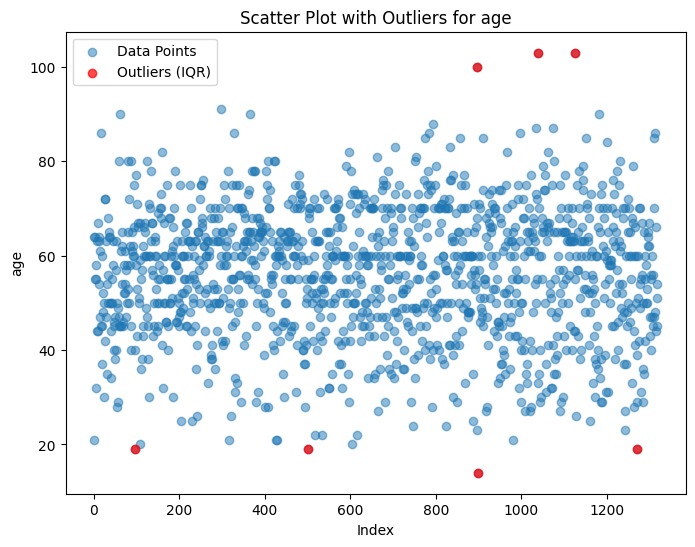

In [8]:
column_name = 'age'

# Menghitung Q1, Q3, dan IQR
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
print("\nOutliers using IQR Method:")
print(outliers_iqr)

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

# Menghapus outliers
data = data.drop(outliers_iqr.index)


- Penjelasan: Anda mengulang metode ini untuk kolom lain seperti impluse, pressurehight, pressurelow, dll.

e. Distribusi Data Target

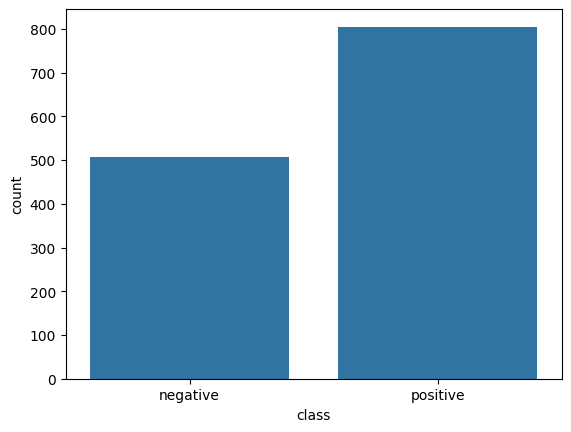

In [9]:
sns.countplot(x='class', data=data)
plt.xticks([0, 1], ['negative', 'positive'])
plt.show()


- Penjelasan: Menampilkan distribusi kelas target (negative dan positive).

f. Analisis Variabel Berdasarkan Gender

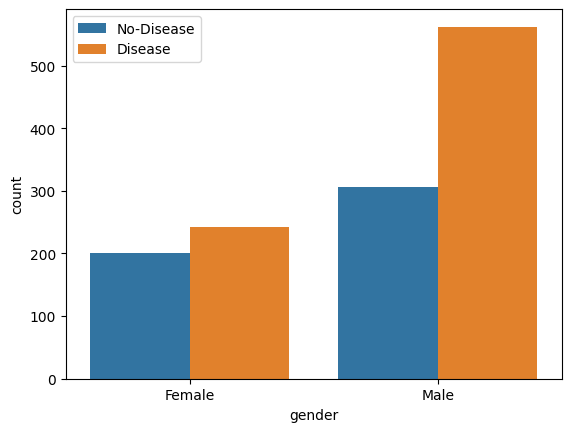

In [10]:
sns.countplot(x='gender', hue="class", data=data)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

- Penjelasan: Menganalisis distribusi kelas target berdasarkan jenis kelamin.

g. Visualisasi Data Normalisasi

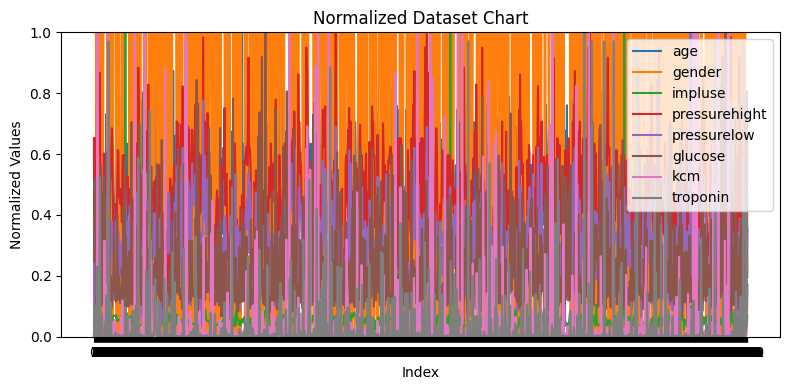

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Kolom yang akan dinormalisasi
columns_to_normalize = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
x_data = data[columns_to_normalize]

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
x_data_normalized = scaler.fit_transform(x_data)
x_data_normalized = pd.DataFrame(x_data_normalized, columns=columns_to_normalize)

fig, ax = plt.subplots(figsize=(8, 4))

for column in columns_to_normalize:
    ax.plot(x_data_normalized[column], label=column)

ax.set_xticks(range(len(x_data_normalized)))
ax.set_xticklabels(x_data_normalized.index)
ax.set_ylim(0, 1)
ax.set_xlabel("Index")
ax.set_ylabel("Normalized Values")
ax.set_title("Normalized Dataset Chart")
ax.legend()
plt.tight_layout()
plt.show()


2. FEATURE ENGINERING

a. Encoding Kolom Target

In [14]:
data['class'] = data['class'].replace({'negative': 0, 'positive': 1})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15764\3596236146.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'negative': 0, 'positive': 1})


- Penjelasan: Mengonversi kelas target dari string ke numerik (0 untuk negative dan 1 untuk positive).

b. Normalisasi Data

In [16]:
columns_to_normalize = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
x_data = data[columns_to_normalize]

scaler = MinMaxScaler()
x_data_normalized = scaler.fit_transform(x_data)
x_data_normalized = pd.DataFrame(x_data_normalized, columns=columns_to_normalize)

- Penjelasan: Data pada kolom numerik dinormalisasi ke rentang 0-1 menggunakan Min-Max Scaling.

c. Pembagian Data Train-Test

In [18]:
import numpy as np

# Example of defining x_data_normalized and y_target
x_data_normalized = np.random.rand(100, 10)  # 100 samples, 10 features
y_target = np.random.randint(0, 2, size=100)  # 100 target labels, binary classification

# Now, use train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_data_normalized, y_target, test_size=0.3, random_state=42
)


- Penjelasan: Dataset dibagi menjadi data latih (70%) dan data uji (30%).

PROSES LEARNING/MODELING
1. Data Preparation dan Preprocesing
- loading & Cleaning: Dataset heart_attack.csv dibaca, outlier dihapus menggunakan metode IQR (Interquartile Range), kolom target (class) dikonversi dari kategori negative dan positive menjadi numerik (0 dan 1).
- Normalization: Kolom numerik (age, impluse, pressurehight, dll.) dinormalisasi menggunakan Min-Max Scaling agar data dalam rentang 0-1.
